## SAYISAL FİLTRE TASARIMI 

### FİLTRE NEDİR?

Sayısal filtre, sayısallaştırılmış analog sinyaller üzerinde çalışan, giriş sinyalini istenen çıkış sinyaline dönüştüren yöntem ya da algoritmadır. Uygulama alanları çok geniş olan filtrelerin başlıca tasarım amaçları arasında, karışmış sinyalleri birbirinden ayırmak, sinyaldeki gürültüyü azaltarak sinyal kalitesini arttırmak, ve bozulmuş sinyalin tekrar elde edilmesi olarak sayılabilir.

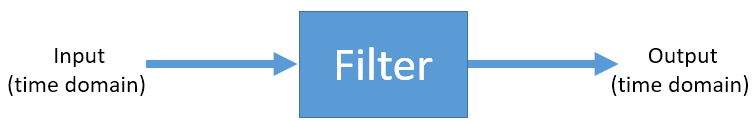



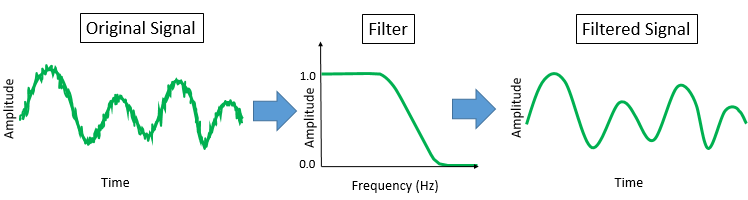

    Filtrelerin tasarımında arzu edilen filtre özellikleri, istenilen genlik ve faz yanıtı bakımından frekans bölgesinde tanımlanır. Filtre tasarım süzgecinde arzu edilen frekans tepkisi özelliklerini, nedensel FIR veya IIR filtrenin en yakın şekilde sağlanması için tepkisi katsayılarını belirleriz. FIR veya IIR şeklinde hangi tip filtrenin tasarlanacağı konusu, problemin doğasına ve arzu edilen frekans tepkisinin özelliklerine bağlıdır.

    Dört temel filtre türü vardır: alçak geçiren, yüksek geçiren, bant geçiren ve bant durduran. Her tür, sinyalleri kendi içindeki farklı frekans aralıklarına odaklanmak için değiştirir. Aşağıdaki grafikler, sinyallerdeki frekansların her bir tip için nasıl filtrelendiğini gösterir.

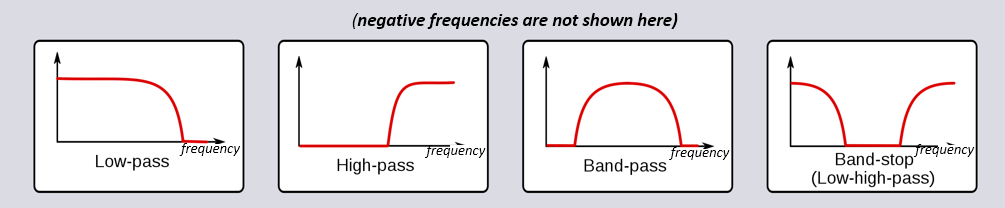

İdeal filtre tasarımlarında işlem yapılması istenilen frekanslarda hemen bastırılması veya geçirilmesi istenilse de pratikte bu durum mümkün değildir.
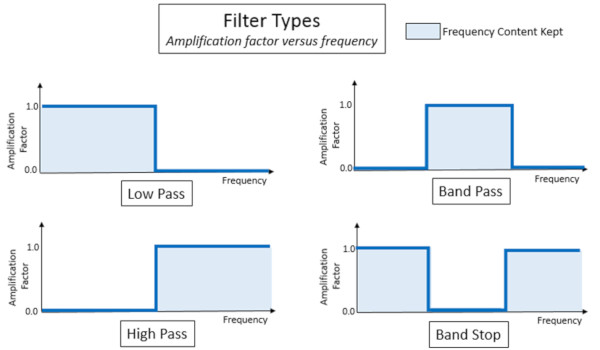

Aşağıdaki şemada, yeşil çizgi, esasen sıfır geçiş genişliğine sahip olan bir geçiş bandı ve durdurma bandı arasında geçiş için ideal yanıtı temsil eder. Kırmızı çizgi, biraz dalgalanmaya ve belirli bir geçiş genişliğine sahip gerçekçi bir filtrenin sonucunu gösterir .
Geçiş genişliğini neden mümkün olduğu kadar küçük ayarlamadığımızı merak ediyor olabilirsiniz. Bunun nedeni, esas olarak, daha küçük bir geçiş genişliğinin daha fazla vuruşla sonuçlanması ve daha fazla vuruşun daha fazla hesaplama anlamına gelmesidir

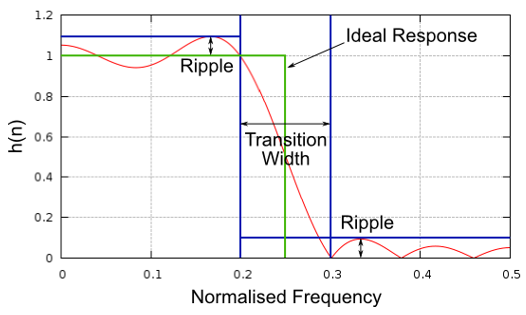

### SAYISAL FİLTRE ÇEŞİTLERİ

#### 1. Sayısal Sonlu Dürtü Yanıt (Finite Impulse Response) Filtre Tasarımı
Bu şekilde birbirine kaskat bağlanmış m adet bölüm görülmekte. Filtrenin yükü şimdiki m ve bir önceki m değerlerinin toplamından oluşmaktadır. Bu değerlerin toplamı filtrenin çıkışını oluşturmaktadır. Filtre katsayıları (Filtre yükü) merkezdeki değere göre ya simetriktir ya da asimetriktir. 

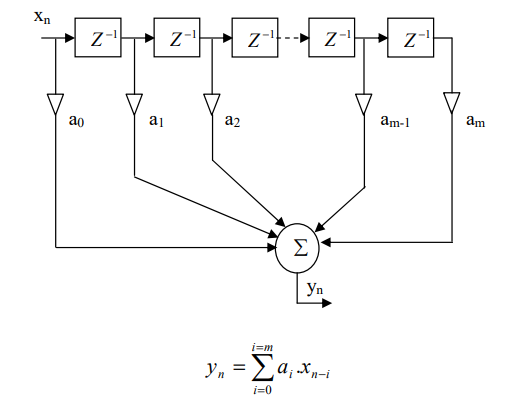

#### 2. Sayısal Sonlu Dürtü Yanıt (Infinite Impulse Response) Filtre Tasarımı
Geri beslemeli bir filtre çeşididir. Hızlı çalışır ancak kararsızdır. Aynı işlemi yapan FIR filtreye göre daha düşük mertebe ile tasarlanabilir.
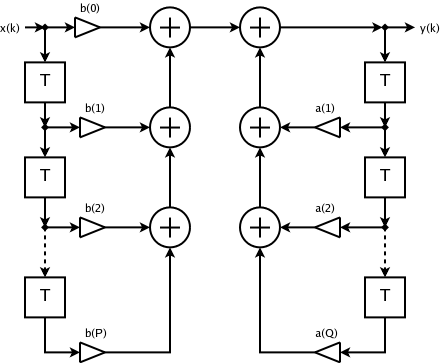

#### FIR Filtre ve IIR Filtre Farkları

Fs = 5000 Hz Fp=1.5 kHz Fstop=1 kHz
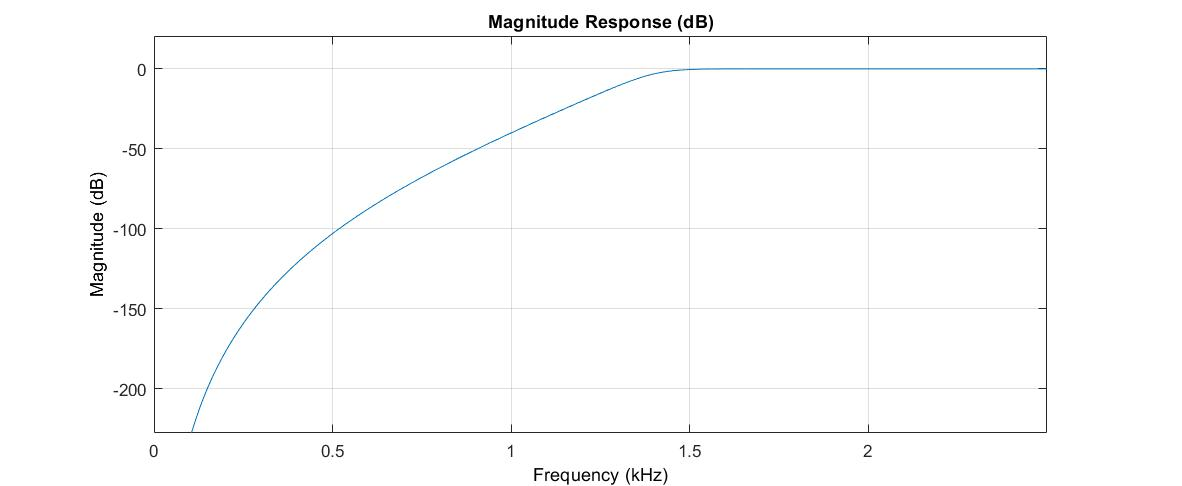
IIR Filtre
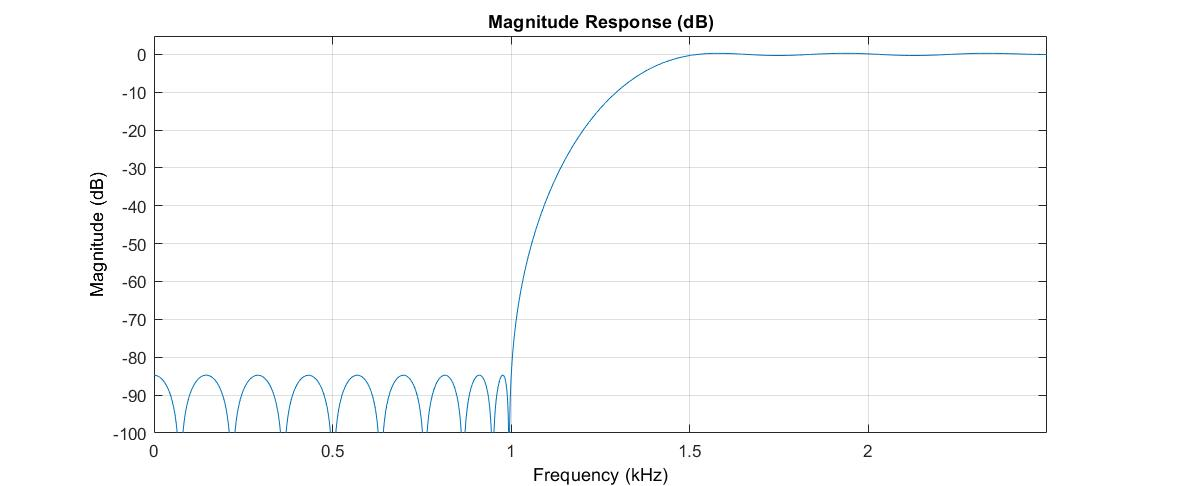
FIR Filtre

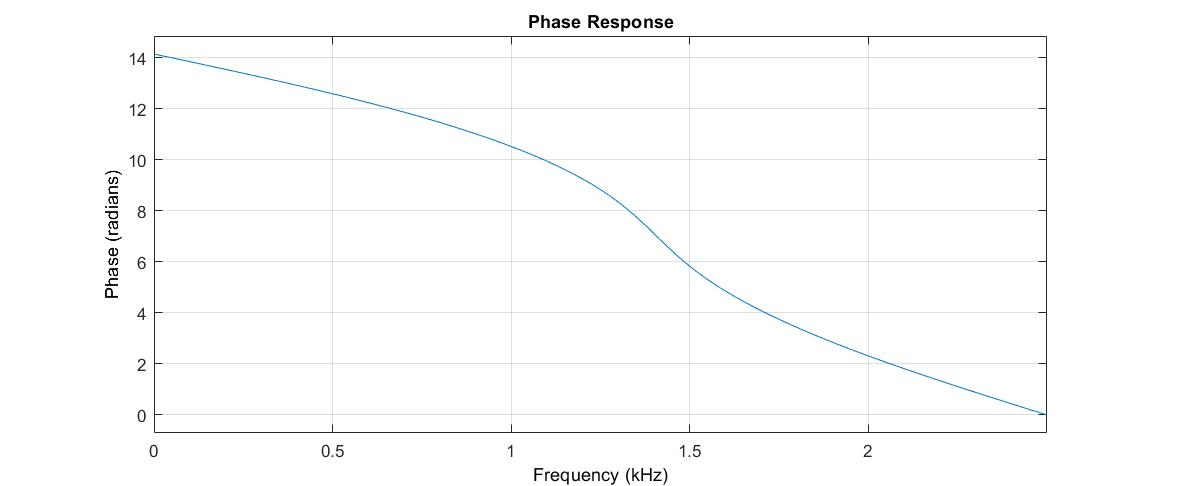 
IIR Filtre
Frekans cevabı non-lineerdir.
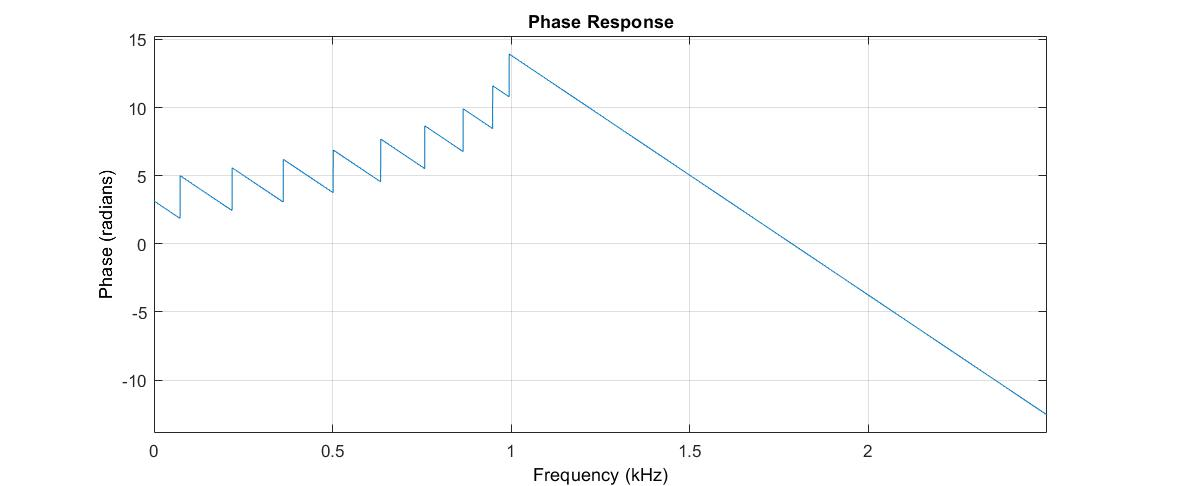
FIR Filtre
Frekans cevabı lineerdir.

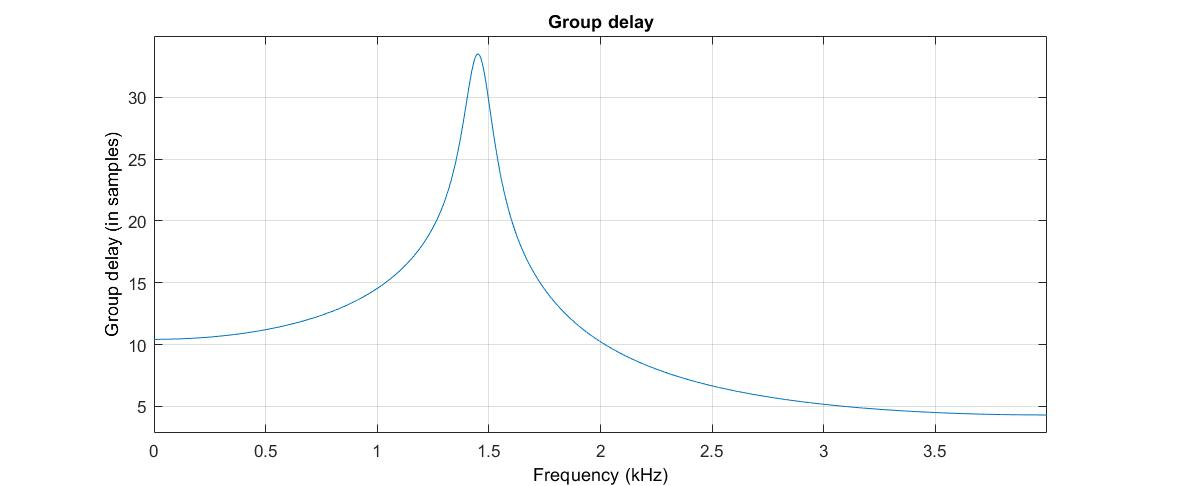
IIR Filtre
Grup gecimesi sabit değildir ve kararsızdır.
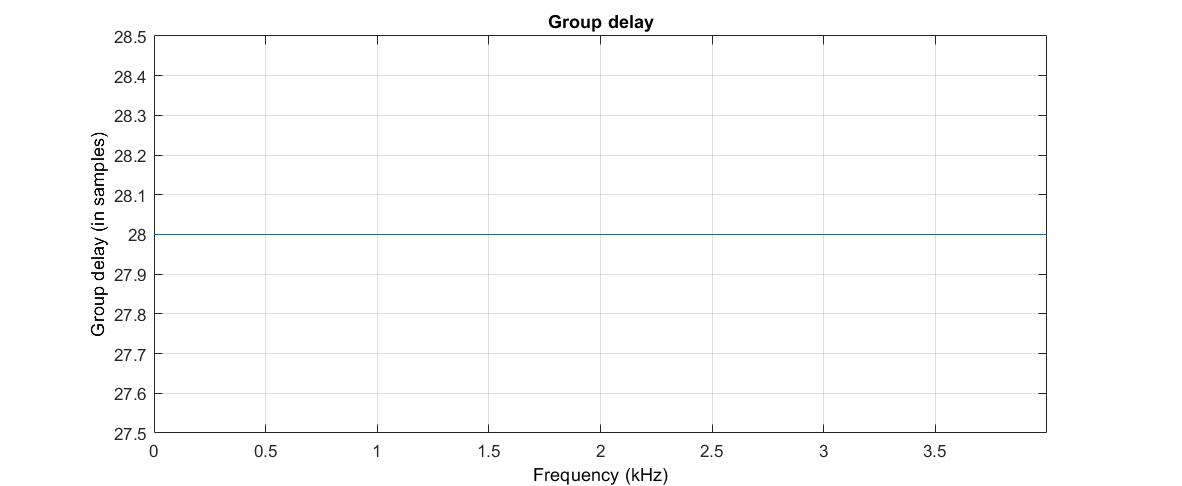
FIR Filtre 
Grup gecikmesi sabit ve kararlıdır.

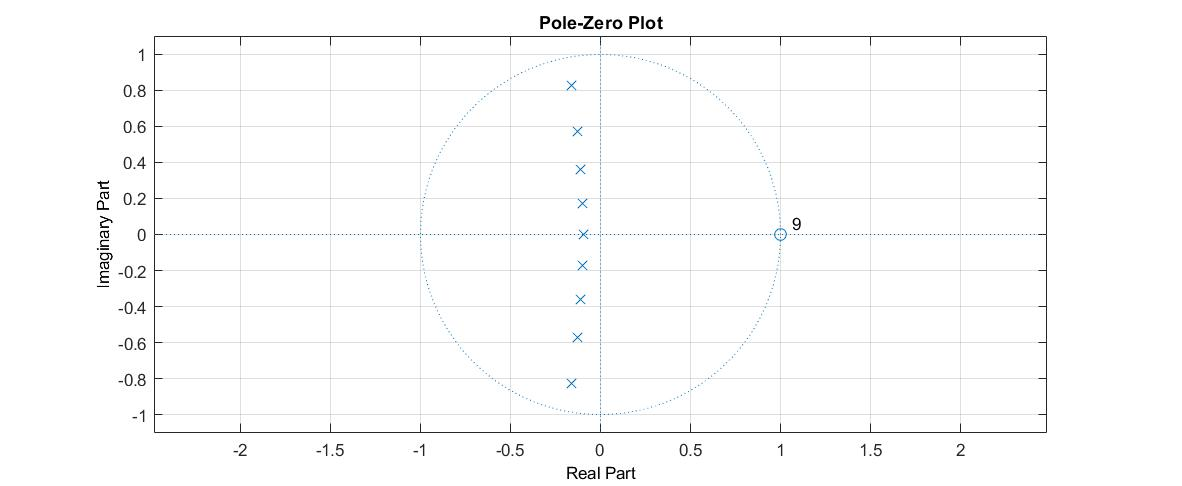
IIR Filtre 

Kutuplar sıfır ile sonsuz arasındadır.
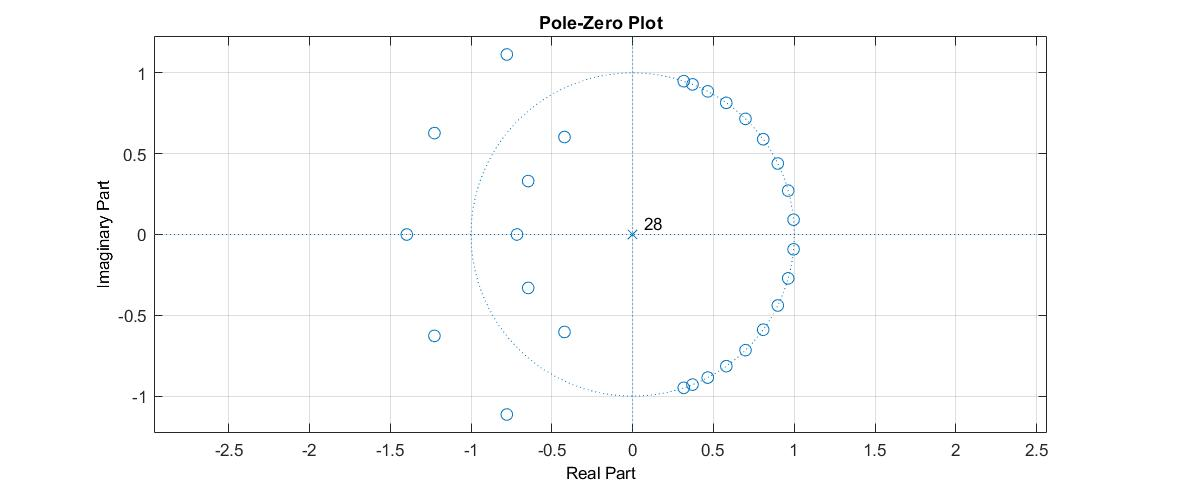
FIR Filtre
Kutuplar ya sıfırdadır ya da sonsuzda.

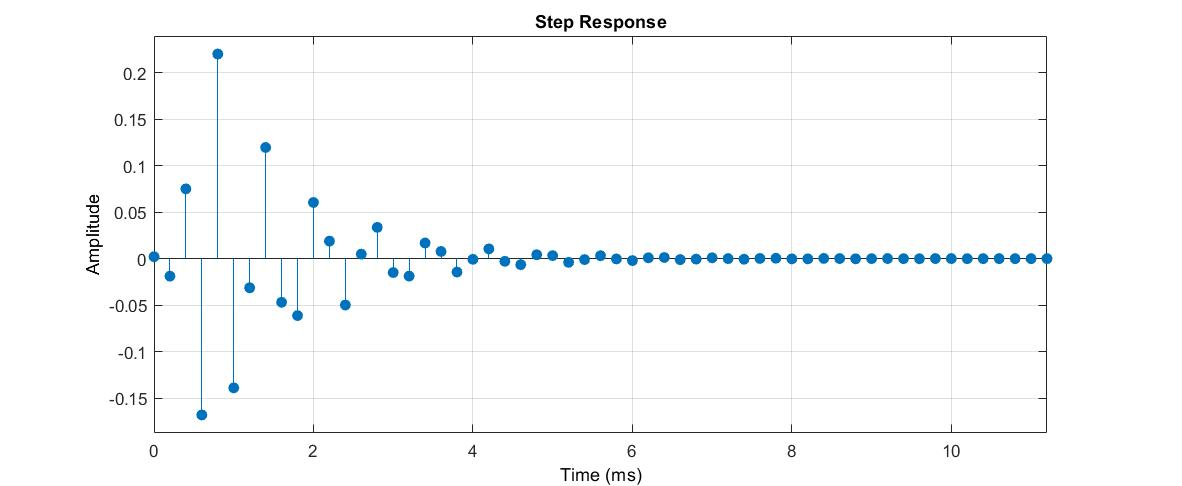
IIR Filtre
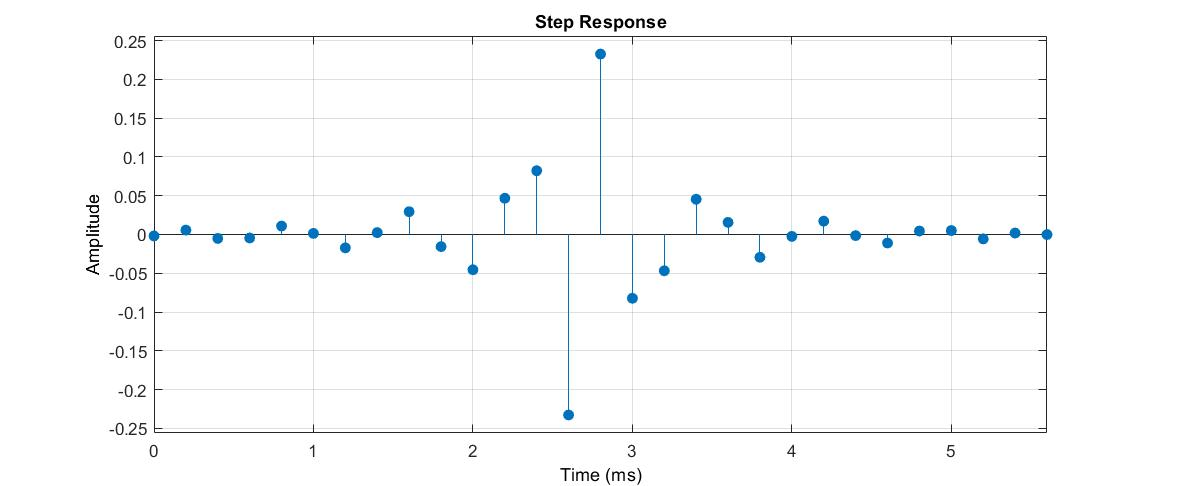 
FIR Filtre


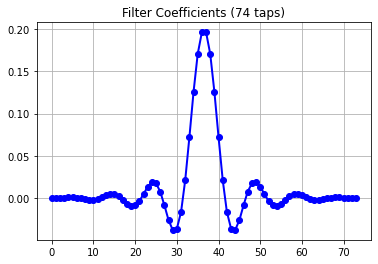

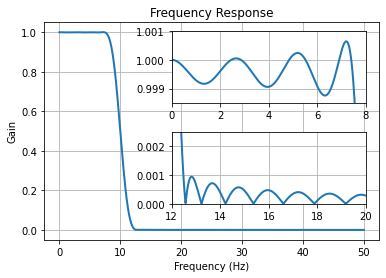

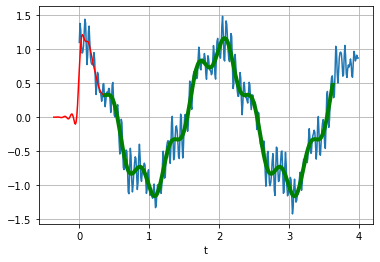

In [8]:
#!python

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

In [10]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)

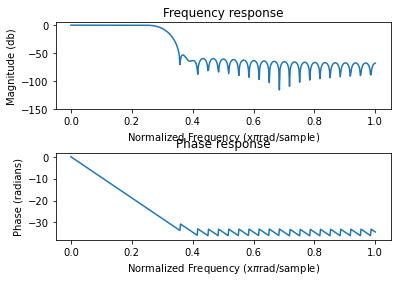

In [11]:
n = 61
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)

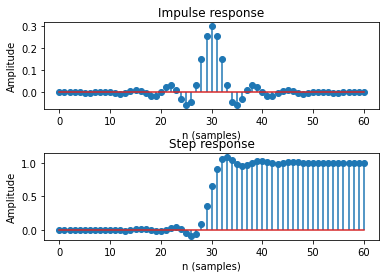

In [14]:
show()
#Impulse and step response
figure(2)
impz(a)
show()

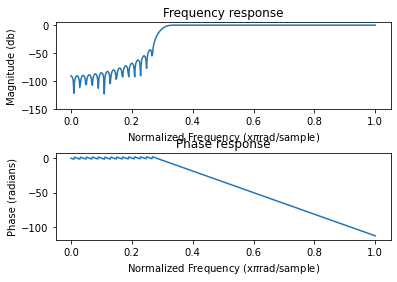

In [15]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
mfreqz(a)
show()


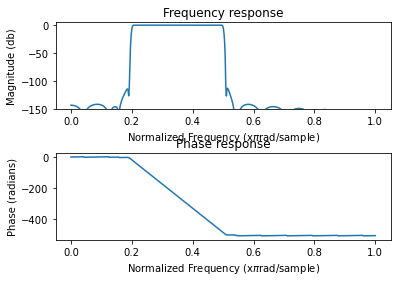

In [16]:
n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
mfreqz(a)
show()